# House Prices Advanced Regression Techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

The competition challenges you to predict the final price of each home.

For each Id in the test set, you must predict the value of the SalePrice variable.

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Data Exploration

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [28]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Handle Missing Data

We will check for null or error data.

In [31]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Our most important column is SalePrice. No null value, no negative value.

Skewness: 1.882876
Kurtosis: 6.536282


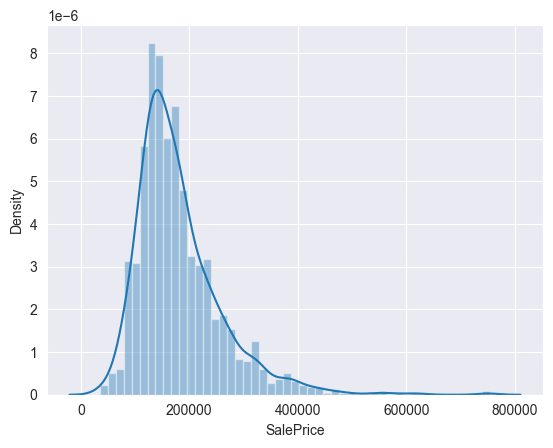

In [32]:
sns.distplot(df_train['SalePrice'])

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

The distribution of SalePrice is not normal. It is right skewed. We will transform it later.

In [33]:
df_null = df_train.isnull().sum().sort_values(ascending=False)
df_null_percent = (df_train.isnull().sum()/df_train.isnull().count() * 100).sort_values(ascending=False)

df_missing = pd.concat([df_null, df_null_percent], axis=1, keys=['Total', 'Percent'])
df_missing.head(20)

Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtQual         37   2.534247
BsmtCond         37   2.534247
BsmtFinType1     37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493
Id                0   0.000000

Are missing value important? Was they not exist or not recorded?

Check at `data_description.txt`, 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' are missing value means no pool, no misc feature, no alley access, no fence, no fireplace. We will replace them with 'NA'.

'LotFrontage' is the linear feet of street connected to property. We will replace them with 0.

'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are missing value means no garage. We will replace them with 'NA'.

'GarageYrBlt', 'GarageArea', 'GarageCars' are missing value means no garage. We will replace them with 0.

'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' are missing value means no basement. We will replace them with 0.

'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' are missing value means no basement. We will replace them with 'NA'.

'MasVnrArea', 'MasVnrType', 'Electrical' are missing a small number. We will just drop them.

In [34]:
df_train['PoolQC'] = df_train['PoolQC'].fillna('NA')
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('NA')
df_train['Alley'] = df_train['Alley'].fillna('NA')
df_train['Fence'] = df_train['Fence'].fillna('NA')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NA')

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

df_train['GarageType'] = df_train['GarageType'].fillna('NA')
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('NA')
df_train['GarageQual'] = df_train['GarageQual'].fillna('NA')
df_train['GarageCond'] = df_train['GarageCond'].fillna('NA')

# We can also try fill NA values with median or mean
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_train['GarageArea'] = df_train['GarageArea'].fillna(0)
df_train['GarageCars'] = df_train['GarageCars'].fillna(0)

df_train['BsmtFinSF1'] = df_train['BsmtFinSF1'].fillna(0)
df_train['BsmtFinSF2'] = df_train['BsmtFinSF2'].fillna(0)
df_train['BsmtUnfSF'] = df_train['BsmtUnfSF'].fillna(0)
df_train['TotalBsmtSF'] = df_train['TotalBsmtSF'].fillna(0)
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].fillna(0)
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].fillna(0)

df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NA')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('NA')
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NA')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NA')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('NA')

df_train_no_missing = df_train.dropna()
df_train_no_missing.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   
2   3          60       RL         68.0    11250   Pave    NA      IR1   
3   4          70       RL         60.0     9550   Pave    NA      IR1   
4   5          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Check the stat of the filled data.

In [35]:
df_train_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallC

In [36]:
print(f'Total missing values: {df_train_no_missing.isnull().sum().sum()}')

Total missing values: 0


## Data Visualization

In [37]:
continuous_columns = [c for c in df_train_no_missing.columns if df_train_no_missing[c].dtype != 'object']
continuous_columns.remove('Id')

discrete_columns = [c for c in df_train_no_missing.columns if df_train_no_missing[c].dtype == 'object']

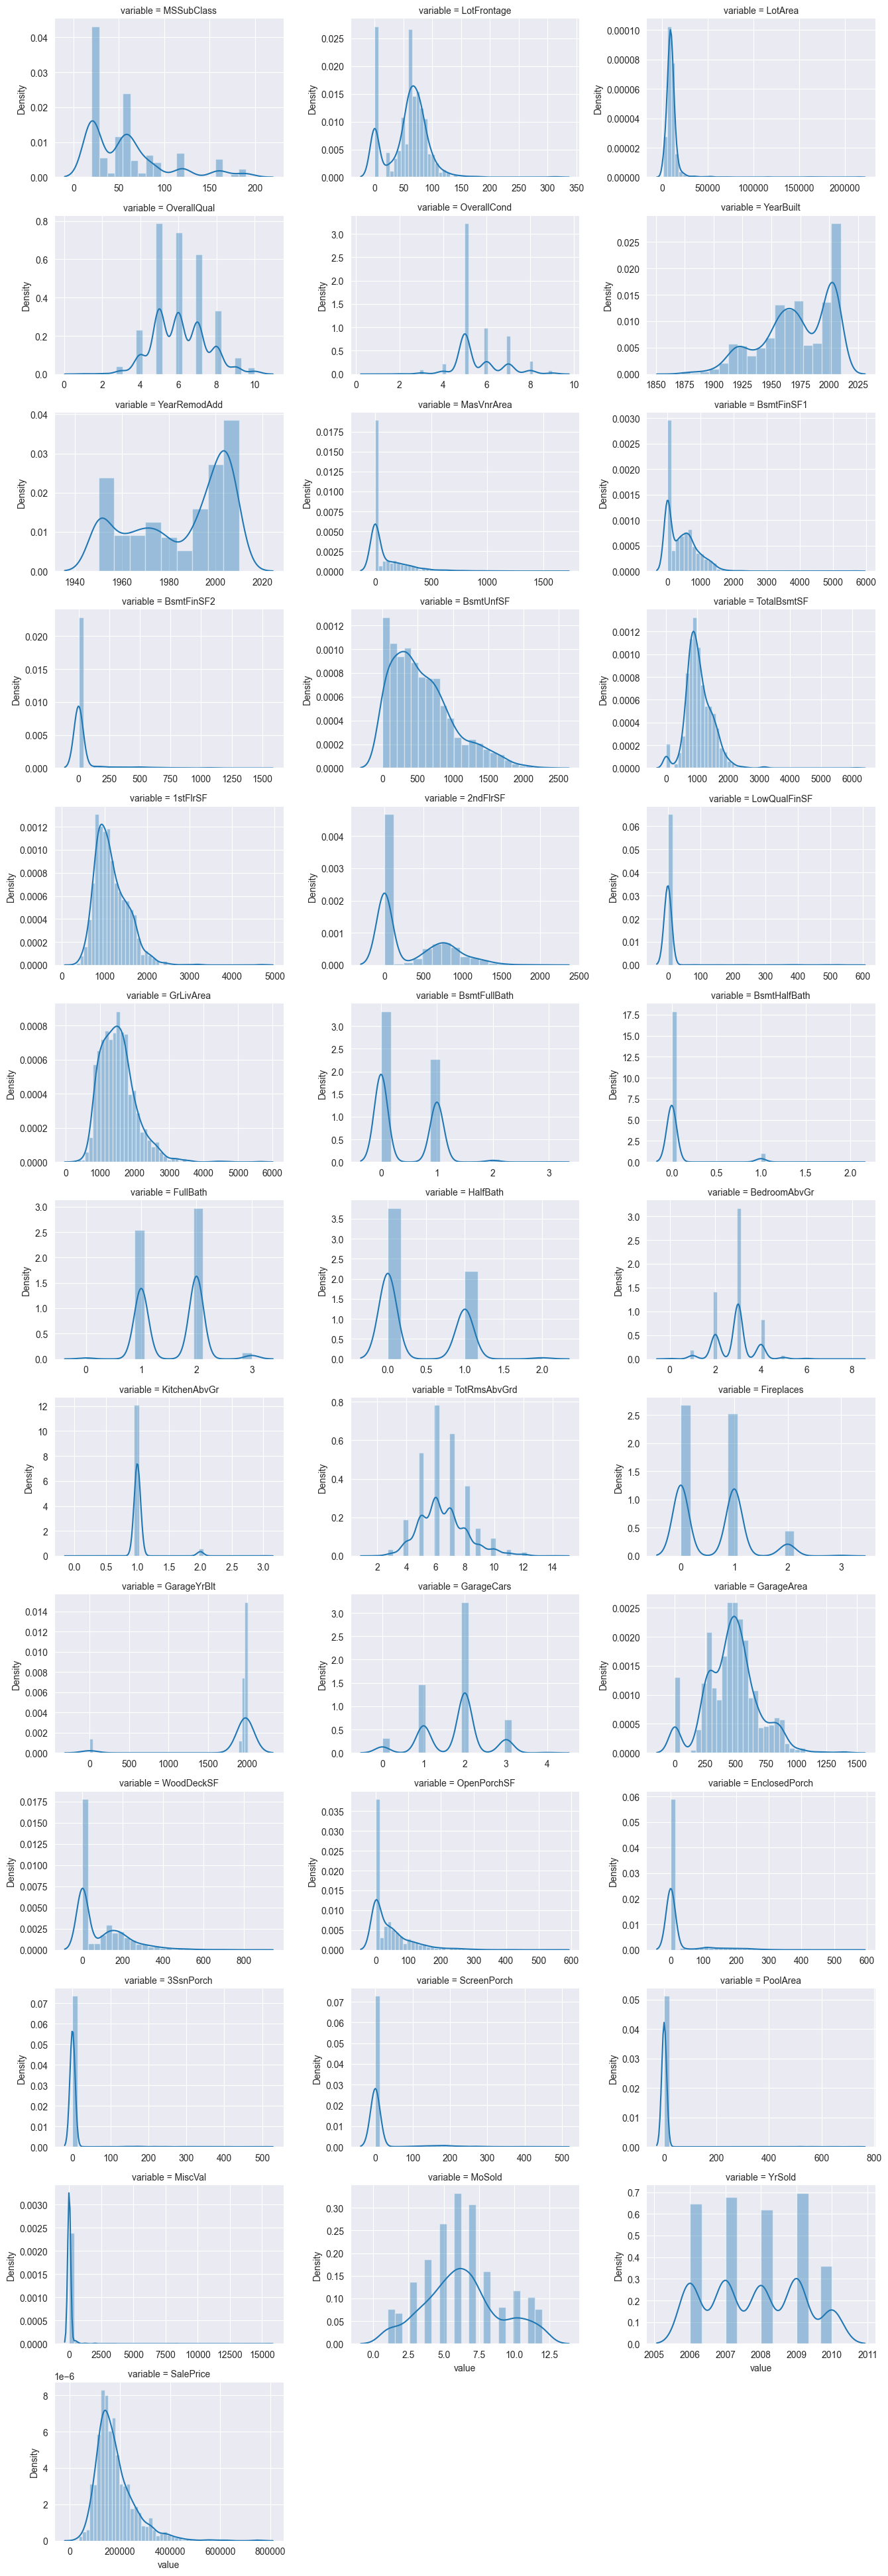

In [38]:
df_continuous_melted = pd.melt(df_train_no_missing, value_vars=continuous_columns)
g = sns.FacetGrid(df_continuous_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.distplot, "value")

In [39]:
df_discrete_melted = pd.melt(df_train_no_missing, value_vars=discrete_columns, id_vars=['SalePrice'])

g = sns.FacetGrid(df_discrete_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)

g.map(sns.boxplot, "value", "SalePrice", palette="hls")

Visualize the correlation between SalePrice and other columns.

Text(0.5, 1.0, 'Negative Correlations')

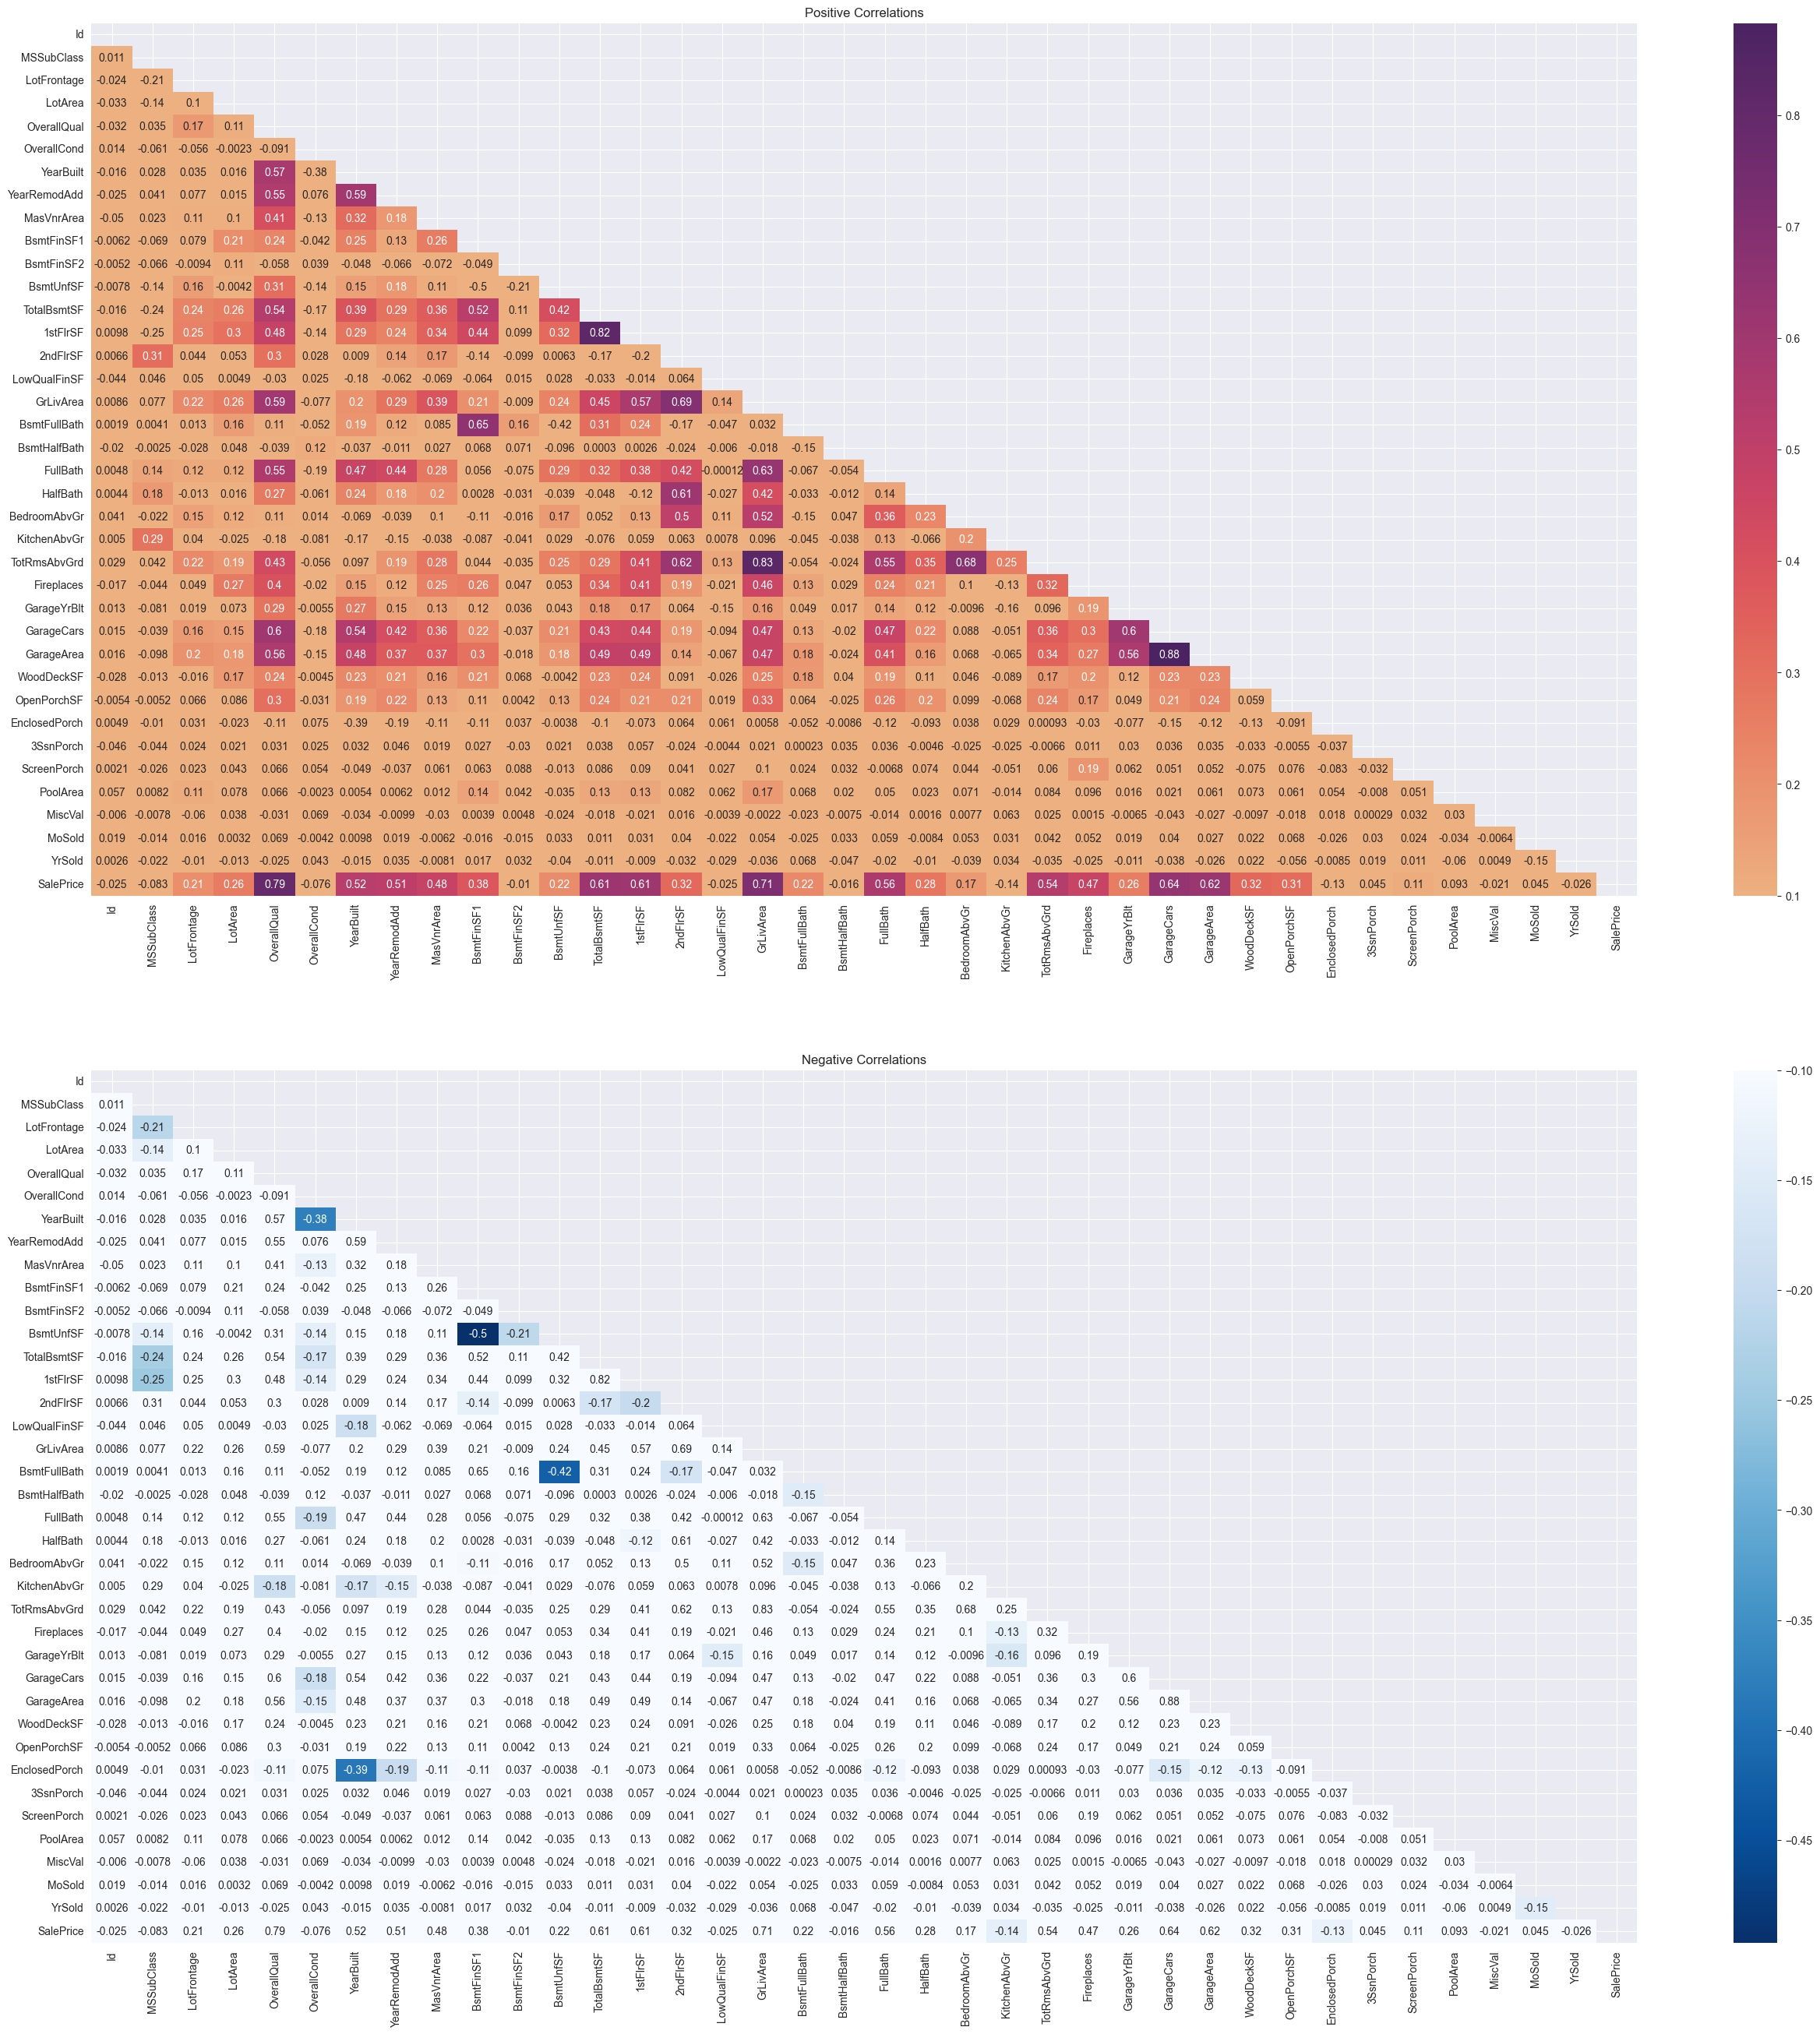

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(32, 32))
corr = df_train_no_missing.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, annot=True, cmap='flare', ax=axes[0], mask=mask, vmin=0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data=corr, annot=True, cmap='Blues_r', ax=axes[1], mask=mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

In [41]:
high_correlated_with_sale_price = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
print(f'High correlated columns: {high_correlated_with_sale_price}')

High correlated columns: ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


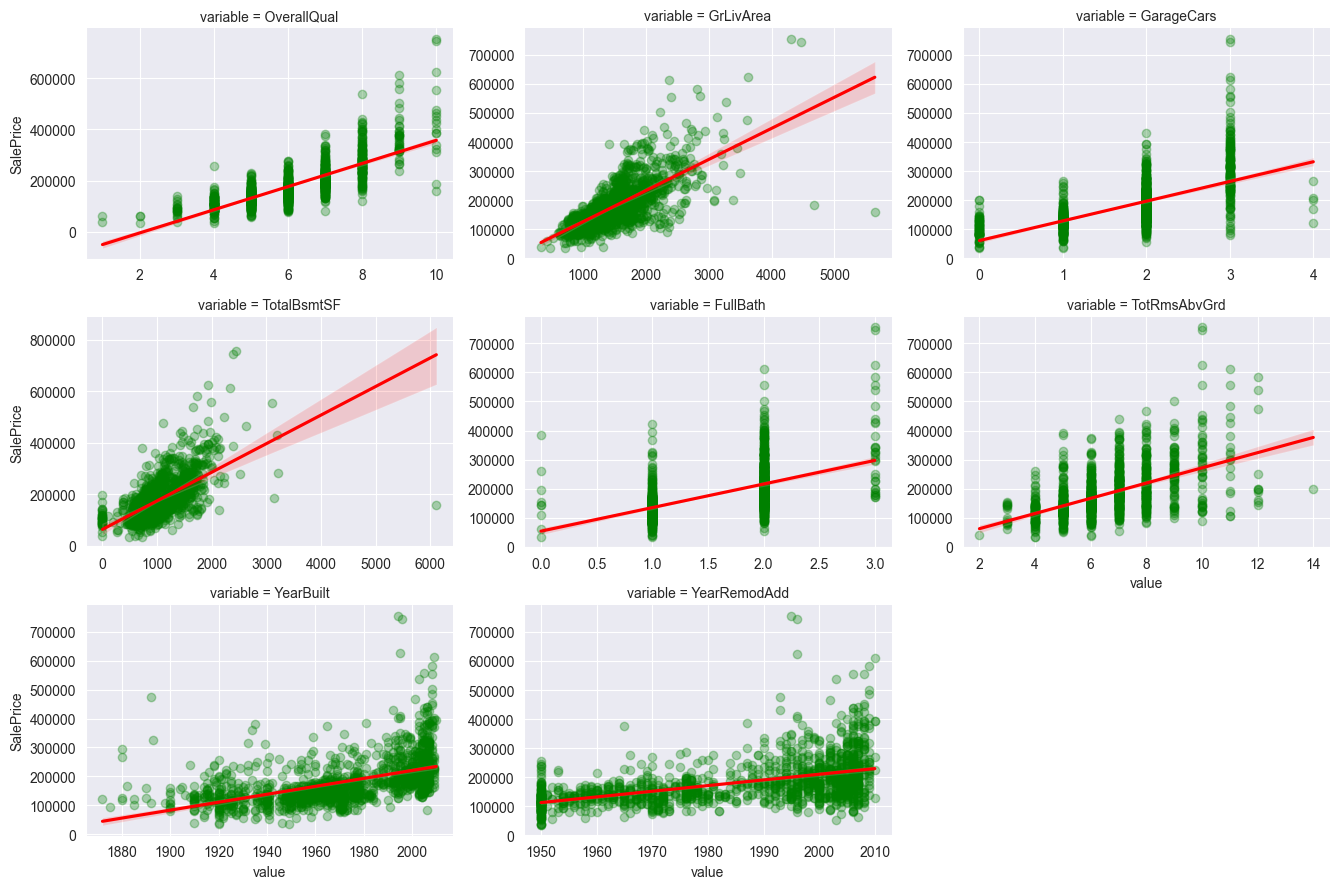

In [42]:
df_high_correlated_melted = pd.melt(df_train_no_missing, value_vars=high_correlated_with_sale_price, id_vars=['SalePrice'])
g = sns.FacetGrid(df_high_correlated_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.regplot, "value", "SalePrice", color='g', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

## Handle Outliner

Check the above graphs, there are not many outliners. We will just drop them manually.

We will look into GrLivArea and TotalBsmtSF. There're some data points that go off trend.

For GarageCars and TotRmsAbvGrd, they may not near the regression line but that just because they don't have enough data for that category.

For YearBuilt and YearRemodAdd, there're some special houses that were very expensive but the regression line looks stable so we will keep them.

In [43]:
print(f"GrLivArea to be dropped: {df_train_no_missing[(df_train_no_missing['GrLivArea']>4000) & (df_train_no_missing['SalePrice']<200000)].index}")
print(f"TotalBsmtSF to be dropped: {df_train_no_missing[(df_train_no_missing['TotalBsmtSF']>6000) & (df_train_no_missing['SalePrice']<200000)].index}")

GrLivArea to be dropped: Int64Index([523, 1298], dtype='int64')
TotalBsmtSF to be dropped: Int64Index([1298], dtype='int64')


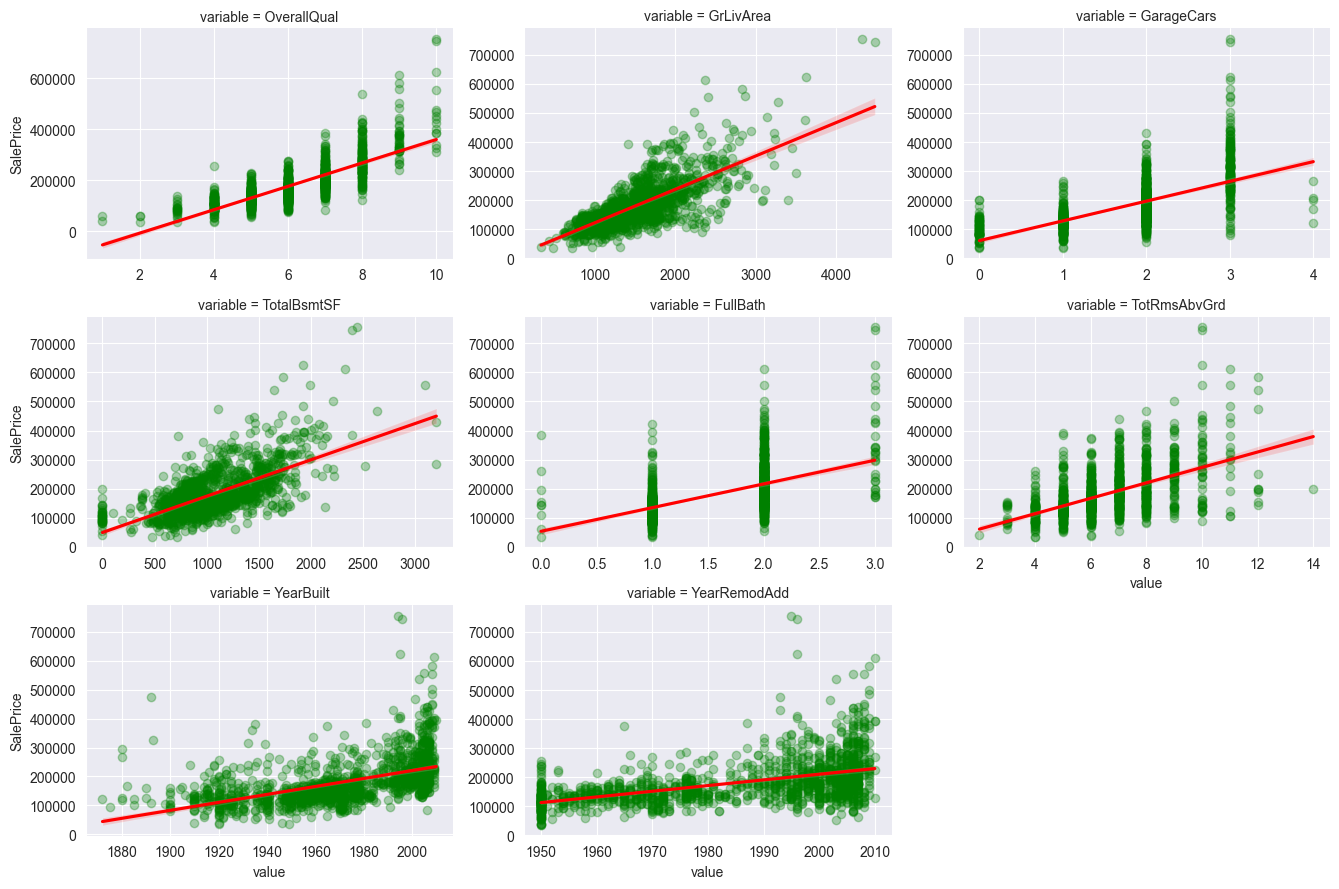

In [44]:
df_no_outliners = df_train_no_missing.drop([523, 1298])
df_no_outliners_melted = pd.melt(df_no_outliners, value_vars=high_correlated_with_sale_price, id_vars=['SalePrice'])
g = sns.FacetGrid(df_no_outliners_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.regplot, "value", "SalePrice", color='g', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

Convert year number to age would make more sense.

In [45]:
# The dataset was published in 2016. So we will use 2016 as the current year.
df_no_outliners['AgeBuilt'] = 2016 - df_no_outliners['YearBuilt']
df_no_outliners['AgeRemodAdd'] = 2016 - df_no_outliners['YearRemodAdd']

OK, we don't need the original year columns anymore.

In [46]:
df_no_outliners = df_no_outliners.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [47]:
high_correlated_with_sale_price.extend(['AgeBuilt', 'AgeRemodAdd'])
high_correlated_with_sale_price.remove('YearBuilt')
high_correlated_with_sale_price.remove('YearRemodAdd')

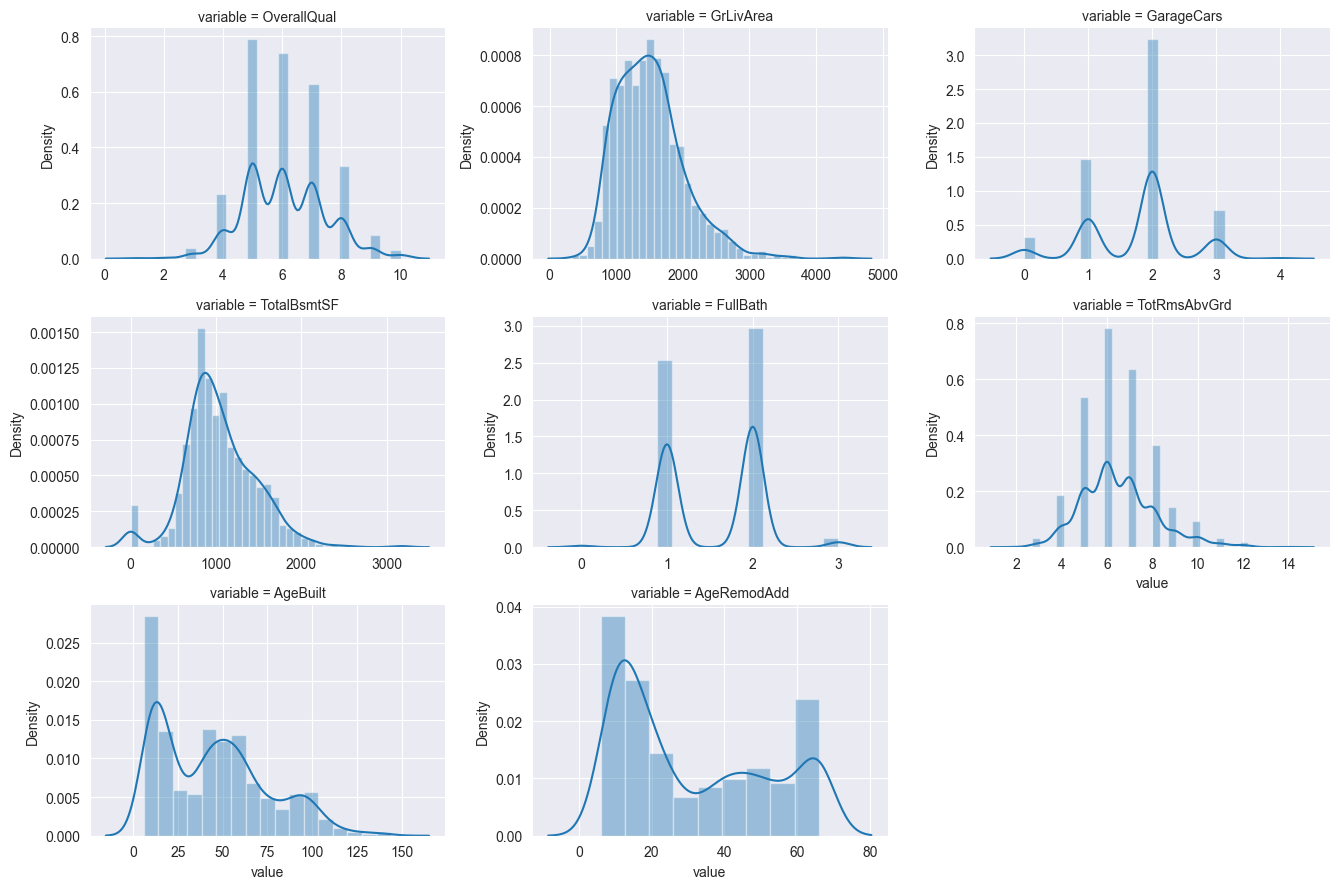

In [48]:
sns.FacetGrid(
    pd.melt(df_no_outliners[high_correlated_with_sale_price], value_vars=high_correlated_with_sale_price),
    col='variable',
    col_wrap=3,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

Look like there're a lot of 0 values in TotalBsmtSF. Let's check it out.

In [49]:
df_no_outliners[df_no_outliners['TotalBsmtSF'] == 0].count()

Id               37
MSSubClass       37
MSZoning         37
LotFrontage      37
LotArea          37
                 ..
SaleType         37
SaleCondition    37
SalePrice        37
AgeBuilt         37
AgeRemodAdd      37
Length: 81, dtype: int64

We will drop them so that we can normalize data later on easier.

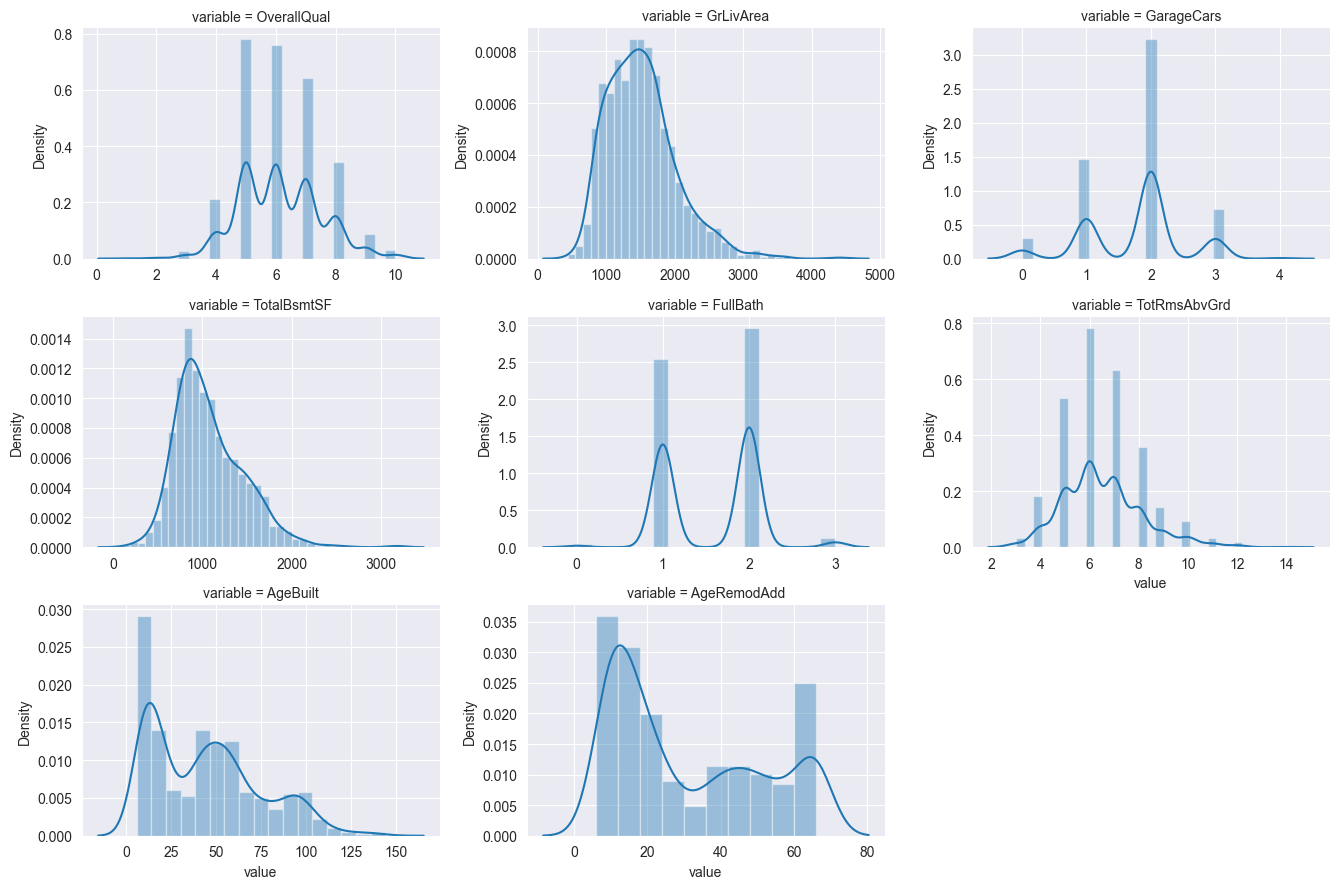

In [50]:
df_no_outliners = df_no_outliners[df_no_outliners['TotalBsmtSF'] != 0]

sns.FacetGrid(
    pd.melt(df_no_outliners[high_correlated_with_sale_price], value_vars=high_correlated_with_sale_price),
    col='variable',
    col_wrap=3,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

## Handle Categorical Data

We picked some continuous columns. Next is discrete columns.

To check correlation between discrete columns and SalePrice, we need to use ANOVA test. But before that, SalePrice should be transformed to normal distribution.

![guide](./img/correlation-test-guide.png)

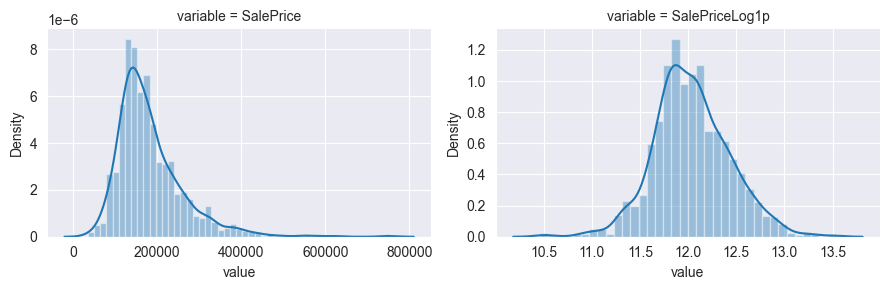

In [51]:
df_no_outliners['SalePriceLog1p'] = np.log1p(df_no_outliners['SalePrice'])

sns.FacetGrid(
    pd.melt(
        df_no_outliners[['SalePriceLog1p', 'SalePrice']],
        value_vars=['SalePrice', 'SalePriceLog1p']
    ),
    col='variable',
    col_wrap=2,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

Look good!

In [52]:
from scipy import stats

def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = discrete_columns
    pvals = []
    fvals = []
    for c in discrete_columns:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePriceLog1p'].values
            samples.append(s)
        fval, pval = stats.f_oneway(*samples)
        pvals.append(pval)
        fvals.append(fval)
    anv['p_value'] = pvals
    anv['f_value'] = fvals
    return anv.sort_values('p_value')

df_anova = anova(df_no_outliners)

df_anova[df_anova['p_value'] < 0.05].reset_index()
df_anova

features        p_value     f_value
8    Neighborhood  2.189009e-235   77.278243
18      ExterQual  2.720771e-185  392.658758
30    KitchenQual  1.140407e-178  374.172998
21       BsmtQual  4.389478e-175  364.330438
34   GarageFinish  2.609873e-141  277.057032
33     GarageType  1.636870e-114  110.799050
32    FireplaceQu  4.510911e-110  125.590811
20     Foundation  1.921277e-103  144.305000
27      HeatingQC   4.368780e-76  101.651822
24   BsmtFinType1   6.471358e-65   69.331108
17     MasVnrType   1.131463e-63  109.400874
0        MSZoning   1.958541e-62   81.732801
15    Exterior1st   1.292394e-53   24.396570
16    Exterior2nd   9.005476e-48   19.375142
35     GarageQual   9.222511e-43   44.542316
36     GarageCond   1.800722e-42   44.228218
42  SaleCondition   2.517312e-40   41.917620
41       SaleType   2.198199e-35   24.406247
28     CentralAir   7.285206e-35  160.245925
23   BsmtExposure   1.376463e-34   43.672781
12     HouseStyle   2.313898e-30   23.514489
3        LotShape   1.896037e-27   44.457052
37     PavedDrive   2.216569e-27   64.126537
29     Electrical   4.741168e-26   32.635020
22       BsmtCond   5.592626e-15   23.722516
39          Fence   2.150737e-14   17.958742
13      RoofStyle   2.972772e-14   14.881150
19      ExterCond   1.871181e-11   14.309275
9      Condition1   8.540790e-11    8.134217
2           Alley   3.122639e-10   22.230713
4     LandContour   4.688664e-09   14.096314
11       BldgType   4.705903e-09   11.332793
26        Heating   6.280767e-08   12.273852
6       LotConfig   4.408886e-07    8.881672
31     Functional   1.994620e-05    5.309283
14       RoofMatl   1.634261e-04    4.489406
10     Condition2   5.141109e-03    2.902275
38         PoolQC   6.682718e-03    4.087824
1          Street   2.192881e-02    5.263085
25   BsmtFinType2   7.274164e-02    1.930521
40    MiscFeature   7.553864e-02    2.124535
7       LandSlope   2.670206e-01    1.321668
5       Utilities   6.050335e-01    0.267591

The lower the p_value, the more significant the feature is. We inverse the p_value to make it easier to visualize.

<Axes: xlabel='inverse_p_value', ylabel='features'>

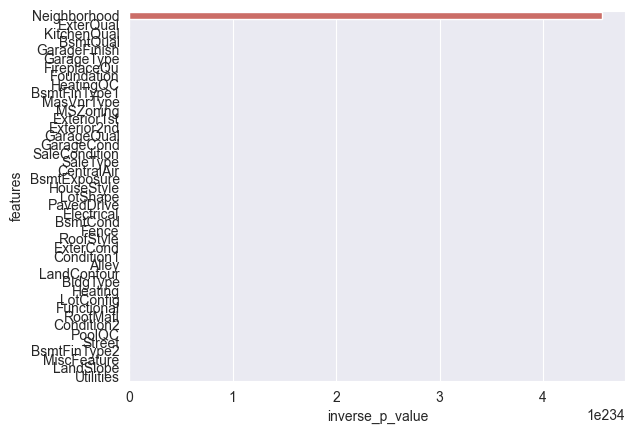

In [53]:
df_anova['inverse_p_value'] = 1 / df_anova['p_value']
sns.barplot(data=df_anova, y='features', x='inverse_p_value', orient='h', palette='hls')

Neighborhood is the most significant feature which make other features trivial. We will pick it.

<Axes: xlabel='SalePriceLog1p', ylabel='Neighborhood'>

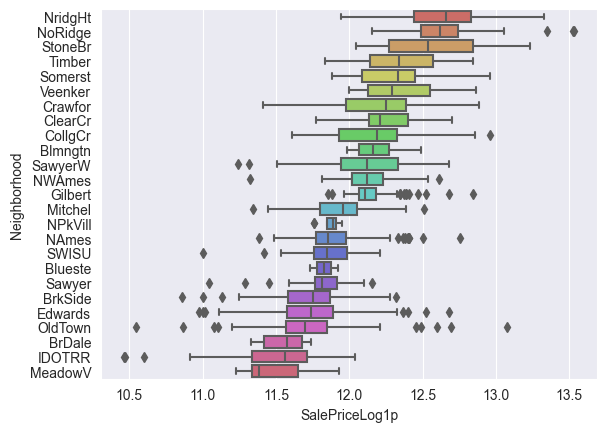

In [54]:
sns.boxplot(
    data=df_no_outliners,
    y='Neighborhood',
    x='SalePriceLog1p',
    palette='hls',
    orient='h',
    order=df_no_outliners.groupby('Neighborhood')['SalePrice']
        .median()
        .sort_values(ascending=False)
        .index
)

Visualize this way, we can see different neighborhoods have different SalePrice.

Next step is to encode the Neighborhood column so that we can use it in the model. At the first look, we can use one-hot encoding. But we will try label encoding first to see if our data have ordinal relationship.

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
ordinal_encoder = OrdinalEncoder()
df_no_outliners['NeighborhoodOrdinal'] = ordinal_encoder.fit_transform(df_no_outliners[['Neighborhood']])

sns.distplot(
    df_no_outliners['NeighborhoodOrdinal'],
    kde=True,
    rug=False,
    bins=len(df_no_outliners['Neighborhood'].unique())
)

<Axes: xlabel='NeighborhoodOrdinal', ylabel='Density'>

We expected it should look somewhat like a normal distribution. But we might try both.

In [57]:
df_no_outliners = pd.get_dummies(df_no_outliners, columns=['Neighborhood'])
df_no_outliners.filter(regex='Neighborhood')

NeighborhoodOrdinal  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0                     5.0                     0                     0   
1                    24.0                     0                     0   
2                     5.0                     0                     0   
3                     6.0                     0                     0   
4                    15.0                     0                     0   
...                   ...                   ...                   ...   
1455                  8.0                     0                     0   
1456                 14.0                     0                     0   
1457                  6.0                     0                     0   
1458                 12.0                     0                     0   
1459                  7.0                     0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
...                   ...                   ...                   ...   
1455                    0                     0                     0   
1456                    0                     0                     0   
1457                    0                     0                     0   
1458                    0                     0                     0   
1459                    0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                        1                     0                     0   
1                        0                     0                     0   
2                        1                     0                     0   
3                        0                     1                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0                     0                     0   
1457                     0                     1                     0   
1458                     0                     0                     0   
1459                     0                     0                     1   

      Neighborhood_Gilbert  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                        0  ...                     0                     0   
1                        0  ...                     0                     0   
2                        0  ...                     0                     0   
3                        0  ...                     0                     0   
4                        0  ...                     1                     0   
...                    ...  ...                   ...                   ...   
1455                     1  ...                     0                     0   
1456                     0  ...                     0                     0   
1457                     0  ...                     0                     0   
1458                     0  ...                     0                     0   
1459                     0  ...                     0                     0   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                        0                   0                    0   
1                        0                   0                    0   
2                        0                   0                    0   
3                        0                   0                    0   
4                        0                   0             

## Normalize Data

In [58]:
tobe_normalized = high_correlated_with_sale_price.copy()
tobe_normalized.append('NeighborhoodOrdinal')

df_tobe_normalized = df_no_outliners[tobe_normalized]
df_skewness = pd.DataFrame(
    {
        "skewness": df_tobe_normalized.skew(),
    }
)

sns.barplot(
    data=df_skewness,
    y=df_skewness.index,
    x='skewness',
    orient='h',
    palette='hls'
)

<Axes: xlabel='skewness'>

We will perform normalize on columns which have skewness > 0.4

In [60]:
df_large_skewness = df_skewness[abs(df_skewness['skewness']) > 0.4]

for col in df_large_skewness.index:
    _lambda = stats.boxcox_normmax(df_tobe_normalized[col], method='mle')
    print(f'Lambda for {col}: {_lambda}')

    if abs(_lambda) > 5:
        df_tobe_normalized[f'Normalized{col}'] = np.log1p(df_tobe_normalized[col])
    else:
        df_tobe_normalized[f'Normalized{col}'] = stats.boxcox(df_tobe_normalized[col], lmbda=_lambda)

Lambda for GrLivArea: 0.030431408319395625
Lambda for TotalBsmtSF: 0.2432300569740604
Lambda for TotRmsAbvGrd: 0.1684604887580934
Lambda for AgeBuilt: 0.26180751496388
Lambda for AgeRemodAdd: 0.004996478251614698


And check skewness again

In [61]:
df_tobe_normalized.filter(regex='Normalized').skew()

NormalizedGrLivArea      -0.000198
NormalizedTotalBsmtSF     0.022921
NormalizedTotRmsAbvGrd    0.003395
NormalizedAgeBuilt       -0.089827
NormalizedAgeRemodAdd    -0.001724
dtype: float64

Visualize data after normalization

In [62]:
sns.FacetGrid(
    pd.melt(
        df_tobe_normalized,
        value_vars=[f'Normalized{col}' for col in df_large_skewness.index]
    ),
    col='variable',
    col_wrap=3,
    height=3,
    aspect=1.5,
    sharex=False,
    sharey=False
).map(
    sns.distplot,
    "value"
)

Except Age columns, the rest look somewhat better.

## Hypothesis

- After selecting important features, we have done scaling and normalizing so that the model could perform better
- Categorical data is also encoded
- Because we need numeric output, we should use regression models (with boosters) in this problem
- Suggesting to try with LGBMRegressor, XGBRegressor, GradientBoostingRegressor,...
- Some online lads suggest stacking all models together, use the average or a set of weights for each model might return better result
- This competition used RMSE as evaluation metric, so we should use RMSE as well
- Finally, this is the house price so SalePrice should be rounded to some extent as after processing